In [10]:
import json
import numpy as np

In [11]:
file_path = '../knowledgebase/labeled_encoded_queries.jsonl'
model_path = '../../semantic_classifier_xgb.joblib'
embedder_path = '../../semantic_embedder.joblib'

In [12]:
from joblib import load
from sentence_transformers import SentenceTransformer

xgb_model = load(model_path)
embedder = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [13]:
queries, labels = [], []
with open(file_path, 'r') as file:
    for line in file:
        obj = json.loads(line)
        queries.append(obj["query"])
        labels.append(obj["label_encoded"])

In [14]:
print("Encoding queries...")
X = embedder.encode(queries, show_progress_bar = True)

Encoding queries...


Batches: 100%|██████████| 361/361 [00:47<00:00,  7.53it/s]


In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, stratify=labels, random_state=42)

NameError: name 'X' is not defined

In [16]:
print("Evaluating XGBoost classifier...")
predictions = xgb_model.predict(X_test)

Evaluating XGBoost classifier...


Classification Report:

              precision    recall  f1-score   support

       dense       0.83      0.85      0.84      1505
      sparse       0.00      0.00      0.00         2
      hybrid       0.70      0.68      0.69       799

    accuracy                           0.79      2306
   macro avg       0.51      0.51      0.51      2306
weighted avg       0.79      0.79      0.79      2306

Confusion Matrix:

[[1278    0  227]
 [   1    0    1]
 [ 257    0  542]]


/Users/omariko/Documents/GitHub/rag-optimizer/myvenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/omariko/Documents/GitHub/rag-optimizer/myvenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/omariko/Documents/GitHub/rag-optimizer/myvenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

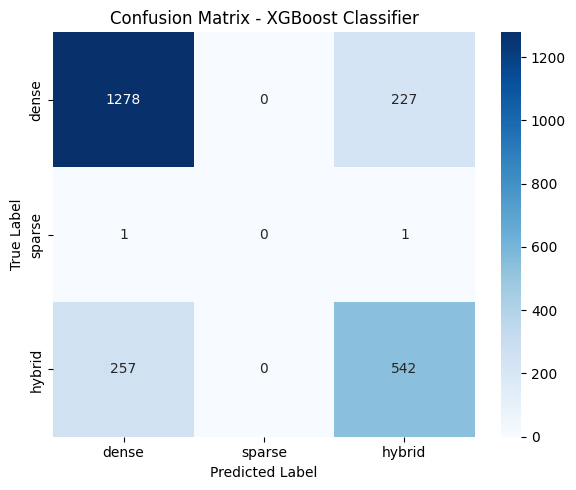

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ["dense", "sparse", "hybrid"]
report = classification_report(y_test, predictions, target_names=target_names)
conf_matrix = confusion_matrix(y_test, predictions)

print("Classification Report:\n")
print(report)

print("Confusion Matrix:\n")
print(conf_matrix)

# --- Plot confusion matrix ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()